## A/B Testing Part 1 

Image you are in a game APP Startup. you are the DS (Data Scientist) at the team. And one day, a PM come to you can said : "Hey I want to know 
if the recent product update really affect the APP download ? , here is the  data of download ***brfore/after prod update in the  control group (with ld version prod) and experiment group (with new version prod)***", can you please
help me to find out the answer and give some suggestion?

So now the DS got the data and start doing the evaluation 


## Contents 

- 0) Data Overview
- 1) Statistics amounts
- 2) Hypothesis Testing
    - 2-0) Define H0, H1 
    - 2-1) P-value
    - 2-2) T-test (dev)
    

In [1]:
# ref 
# https://github.com/yennanliu/hackermath/blob/master/Module_2f_ABTesting.ipynb
# https://github.com/omoju/Fundamentals/blob/master/Data/data_Stats_4_ABTesting.ipynb


In [2]:
# OP 
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
%pylab inline
import seaborn  as sns 
import matplotlib.pyplot as plt
from matplotlib import pyplot



Populating the interactive namespace from numpy and matplotlib


In [3]:

# set plot style
matplotlib.style.use('fivethirtyeight')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10,10)

In [4]:
# overview of  prod download data 
# let's create some toy data represent download in 2 groups 

# control group (with old version prod) 
# experiment group (with new version prod)

# df_before: download before prod update 
# control_dl : control group download 
# exp_dl : experiment group download 
df_before = pd.DataFrame({'exp_dl':[100,120,100,110,90,100,120,103,110,95,100] ,
                        'control_dl':[90,117,100,120,100,130,100,90,110,100,105] })

# df_after: download after prod update 
df_after = pd.DataFrame({'exp_dl':[100,120,150,200,210,200,200,250,300,200,200] ,
                        'control_dl':[91,117,101,119,100,131,100,91,110,99,104] })



## 0) Data Overview

In [5]:
# df_before: download before prod update 
df_before

,control_dl,exp_dl
0,90,100
1,117,120
2,100,100
3,120,110
4,100,90
5,130,100
6,100,120
7,90,103
8,110,110
9,100,95


In [6]:
# df_after: download after prod update 
df_after

,control_dl,exp_dl
0,91,100
1,117,120
2,101,150
3,119,200
4,100,210
5,131,200
6,100,200
7,91,250
8,110,300
9,99,200


----------  before prod update ----------


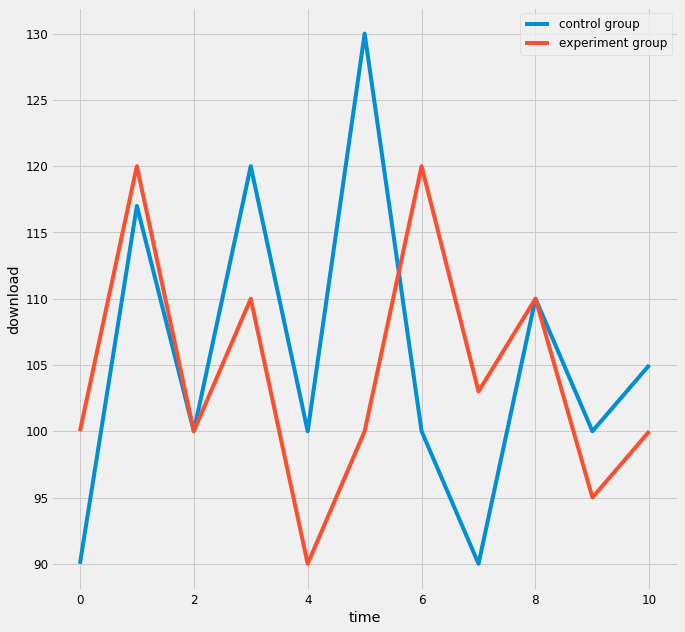

----------  after prod update ----------


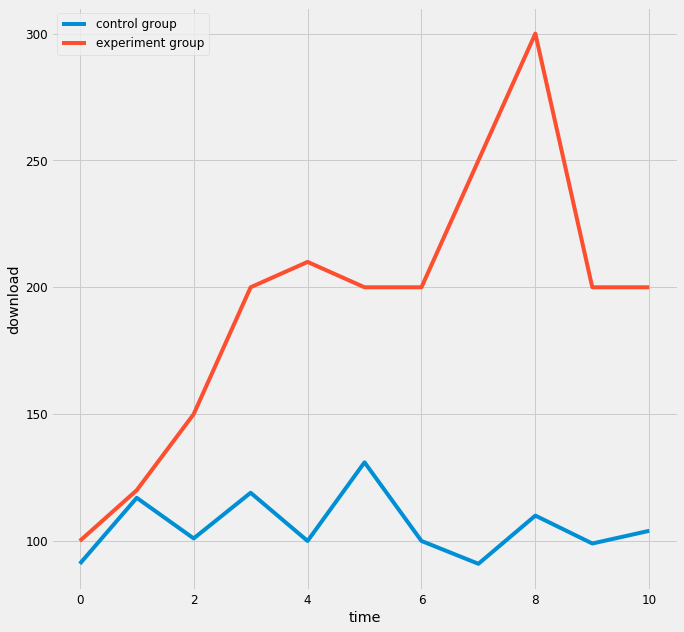

In [7]:
# curve plot 

print ('----------  before prod update ----------')
plt.plot(df_before)
plt.legend(['control group','experiment group'])
plt.xlabel('time')
plt.ylabel('download')
plt.show()


print ('----------  after prod update ----------')
plt.plot(df_after)
plt.legend(['control group','experiment group'])
plt.xlabel('time')
plt.ylabel('download')
plt.show()

----------  before prod update ----------


/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


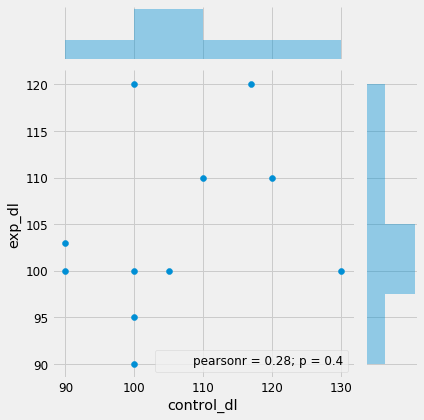

----------  after prod update ----------


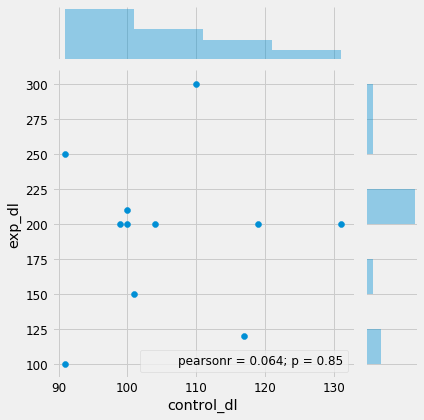

In [8]:
# scatter plot 

print ('----------  before prod update ----------')
sns.jointplot(x= "control_dl", y ="exp_dl", data=df_before)
plt.show()


print ('----------  after prod update ----------')
sns.jointplot(x= "control_dl", y ="exp_dl", data=df_after)
plt.show()

## 1) Statistics amounts

In [9]:
# calculate the mean 


print("Before prod update")
print(df_before.mean())
print()
print("After  prod update:")
print(df_after.mean())



Before prod update
control_dl    105.636364
exp_dl        104.363636
dtype: float64

After  prod update:
control_dl    105.727273
exp_dl        193.636364
dtype: float64


In [10]:
# calculate the standard deviation  


print("Before prod update")
print(df_before.std())
print()
print("After  prod update:")
print(df_after.std())


Before prod update
control_dl    12.508179
exp_dl         9.615329
dtype: float64

After  prod update:
control_dl    12.370052
exp_dl        55.726605
dtype: float64


In [11]:
# calculate the co-variance


print("Before prod update")
print(df_before.cov())
print()
print("After  prod update:")
print(df_after.cov())


Before prod update
            control_dl     exp_dl
control_dl  156.454545  33.945455
exp_dl       33.945455  92.454545

After  prod update:
            control_dl       exp_dl
control_dl  153.018182    44.090909
exp_dl       44.090909  3105.454545


In [12]:
# calculate the co-relation 


print("Before prod update")
print(df_before.corr())
print()
print("After  prod update:")
print(df_after.corr())


Before prod update
            control_dl    exp_dl
control_dl    1.000000  0.282243
exp_dl        0.282243  1.000000

After  prod update:
            control_dl    exp_dl
control_dl    1.000000  0.063961
exp_dl        0.063961  1.000000


In [18]:
################################

## 2) Hypothesis Testing


>Given the sample and an effect, what is the probability of seeing that effect just by chance?

> - Steps 
     1. Define  ***Null Hypothesis (H0) & Alternate hypothesis (H1)***
     2. Compute test statistic
     3. Compute p-value
     4. Interpret the result
     
     
>- Description
 * If the p-value is very low (set p-value = 0.05 in common cases), that means the effect 
is ***unlikely*** to have occured ***by chance***. i.e. We assume the effect is false (H0, null hypothesis), if the computed *** probability of obtaining the effect (p-value) is very low (<  0.05 in common cases), we reject the null hypothesis*** (and accept H1 ).
 
In short words,
> If probability(H0) < p-value, then reject H0

e.g. 
> Let's say there is a mineral water product with statement "every 100 ml water should have calcium >=  400 μg  ". you want to validate if the statement is true or not, so you 
set up the hypothesis test with  *** Null hypothesis (H0) : calcium >=  400 μg , * Alternate hypothesis (H1) calcium <  400 μg , with  p-value = 0.05  ***. Image the sampling experiment outcome is : *** avg calcium = 350 μg with probability  = 0.02 ***. Then you are going to *** reject H0 (Null hypothesis)***, since *** it's just too unlikely to grab the sample has calcium = 350 μg (probability  = 0.02  <<  p-value 0.05) ***

### 2-0) Define H0, H1 

> *  H0 :  *** D(exp_before) = D(exp_after) ***
    - (Download within experiment groups are the same  before and after prod update. )
> * H1 : *** D(exp_before) != D(exp_after) ***
    - (Download within experiment groups are ***different  *** before and after prod update. )

### 2-1) P-value

### 2-2) T-test

----------  before prod update ----------


/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


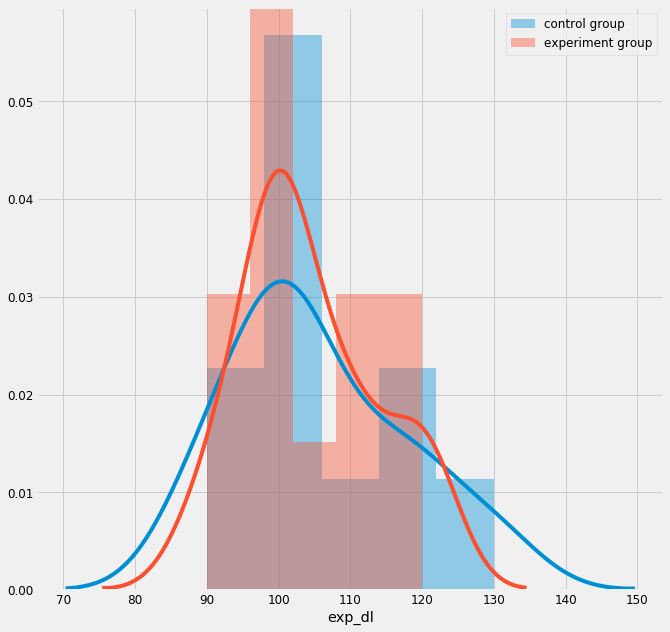

----------  after prod update ----------


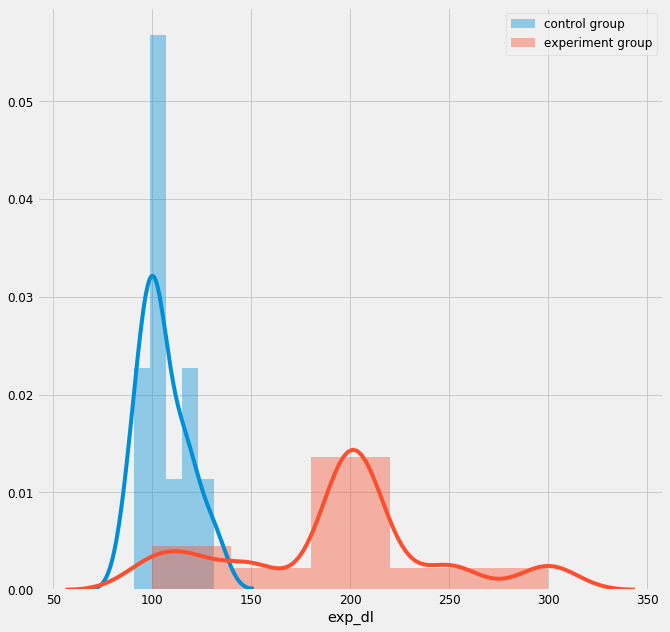

In [13]:
print ('----------  before prod update ----------')
sns.distplot(df_before['control_dl'],bins=5)
sns.distplot(df_before['exp_dl'],bins=5)
plt.legend(['control group','experiment group'])
plt.show()

print ('----------  after prod update ----------')
sns.distplot(df_after['control_dl'],bins=5)
sns.distplot(df_after['exp_dl'],bins=5)
plt.legend(['control group','experiment group'])
plt.show()

In [14]:
# Confidence interval  : 95% ( assume here)
# get Confidence interval on the  "mean of download "  on control  group download before prod update 


c_interval=stats.norm.interval(0.95, loc=df_before.control_dl.mean(), 
scale = df_before.control_dl.std()/np.sqrt(len(df_before)))
c_interval

(98.244637957212461, 113.02808931551482)

----------  control_dl download confidence interval (before prod update)  ----------


/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


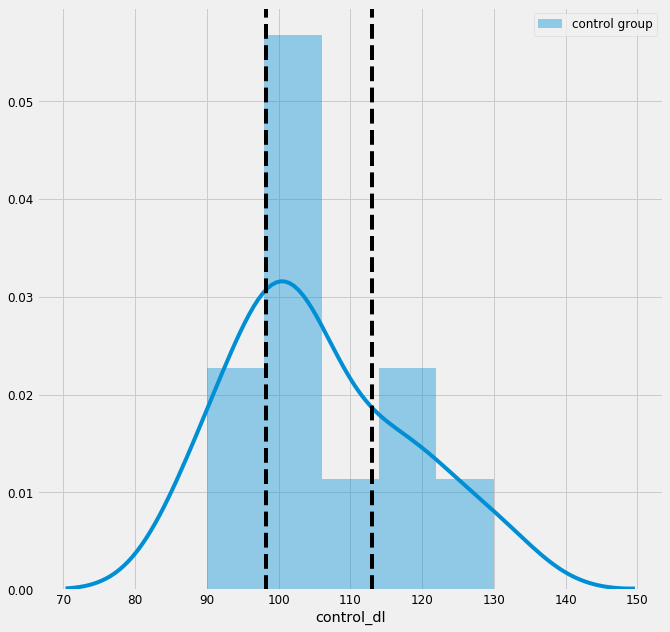

In [15]:
print ('----------  control_dl download confidence interval (before prod update)  ----------')
sns.distplot(df_before['control_dl'],bins=5)
#sns.distplot(df_before['exp_dl'],bins=5)
plt.legend(['control group'])
plt.axvline(x=c_interval[0],c='black',linestyle='--')
plt.axvline(x=c_interval[1],c='black',linestyle='--')
plt.show()


In [16]:
# Confidence interval  : 95% ( assume here)
# get the Confidence interval on the "mean of download " on experiment group download before prod update 


c_interval=stats.norm.interval(0.95, loc=df_before.exp_dl.mean(), 
scale = df_before.control_dl.std()/np.sqrt(len(df_before)))
c_interval


(96.971910684485181, 111.75536204278754)

----------  control_dl download confidence interval (before prod update)  ----------


/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


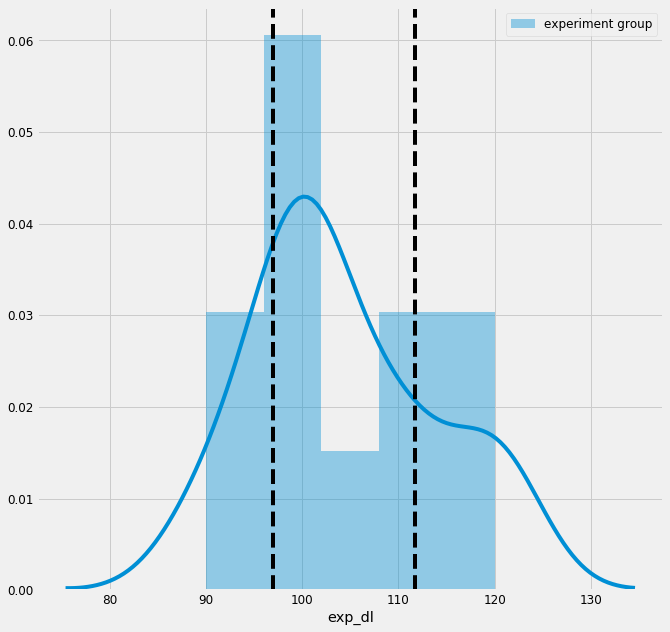

In [17]:
print ('----------  control_dl download confidence interval (before prod update)  ----------')
#sns.distplot(df_before['control_dl'],bins=5)
sns.distplot(df_before['exp_dl'],bins=5)
plt.legend(['experiment group'])
plt.axvline(x=c_interval[0],c='black',linestyle='--')
plt.axvline(x=c_interval[1],c='black',linestyle='--')
plt.show()
